In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [6]:
# Do a shape to get the shape of the dataset

df = pd.read_csv('spotify_tracks.csv')
df.shape

(1229, 22)

In [7]:
# Examine data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 22 columns):
chart_appearances    1229 non-null int64
track_id             1229 non-null object
title                1228 non-null object
artist               1228 non-null object
danceability         1229 non-null float64
energy               1229 non-null float64
key                  1229 non-null int64
loudness             1229 non-null float64
mode                 1229 non-null int64
speechiness          1229 non-null float64
acousticness         1229 non-null float64
instrumentalness     1229 non-null float64
liveness             1229 non-null float64
valence              1229 non-null float64
tempo                1229 non-null float64
type                 1229 non-null object
id                   1229 non-null object
uri                  1229 non-null object
track_href           1229 non-null object
analysis_url         1229 non-null object
duration_ms          1229 non-null int64
time_s

In [8]:
df[df.title.isnull()]

,chart_appearances,track_id,title,artist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1135,1,2ygoLQSuGueOp09Z0czkMW,NaN,NaN,0.743,0.762,0,-11.46,1,0.0524,...,0.0999,0.768,93.009,audio_features,2ygoLQSuGueOp09Z0czkMW,spotify:track:2ygoLQSuGueOp09Z0czkMW,https://api.spotify.com/v1/tracks/2ygoLQSuGueO...,https://api.spotify.com/v1/audio-analysis/2ygo...,113657,4


In [9]:
df = df.drop(1135)

In [10]:
len(df)

1228

In [13]:
print([i for i in df['artist'][0:10]])

[" Girls' Generation-Oh!GG", ' Lukas Graham', ' Silk City', ' Ava Max', ' Marshmello', ' brb.', ' Lil Mosey', ' Dean Lewis', ' Lauren Daigle', ' Shannon Purser']


In [14]:
df.loc[:, 'artist'] = df.loc[:, 'artist'].str.strip()

In [15]:
df.describe()

,chart_appearances,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000,1228.000000
mean,14.738599,0.628846,0.596160,5.298046,-7.108884,0.650651,0.090254,0.327691,0.031351,0.176042,0.471848,120.720719,214182.720684,3.942997
std,18.698332,0.156786,0.207795,3.610737,3.411417,0.476958,0.093310,0.288205,0.148977,0.133598,0.221009,29.184913,55464.468020,0.335377
min,1.000000,0.124000,0.008960,0.000000,-32.707000,0.000000,0.023500,0.000013,0.000000,0.021100,0.036900,48.991000,32333.000000,1.000000
25%,4.000000,0.520750,0.461000,2.000000,-8.565500,0.000000,0.036000,0.076575,0.000000,0.097500,0.297750,98.011500,183020.250000,4.000000
50%,8.000000,0.645500,0.609500,5.000000,-6.388000,1.000000,0.050200,0.235500,0.000000,0.122000,0.453000,120.035500,207102.000000,4.000000
75%,18.000000,0.745000,0.755500,8.000000,-4.821750,1.000000,0.098500,0.543250,0.000022,0.219000,0.636500,139.991500,234037.750000,4.000000
max,177.000000,0.978000,0.996000,11.000000,-0.857000,1.000000,0.902000,0.995000,0.966000,0.960000,0.969000,208.225000,620101.000000,5.000000


In [7]:
original_count = df['chart_appearances'].copy()
df['chart_appearances'] = np.log(df['chart_appearances'])

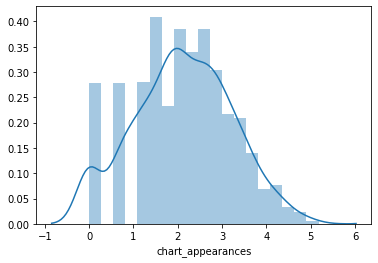

In [9]:
sns.distplot(df.chart_appearances);

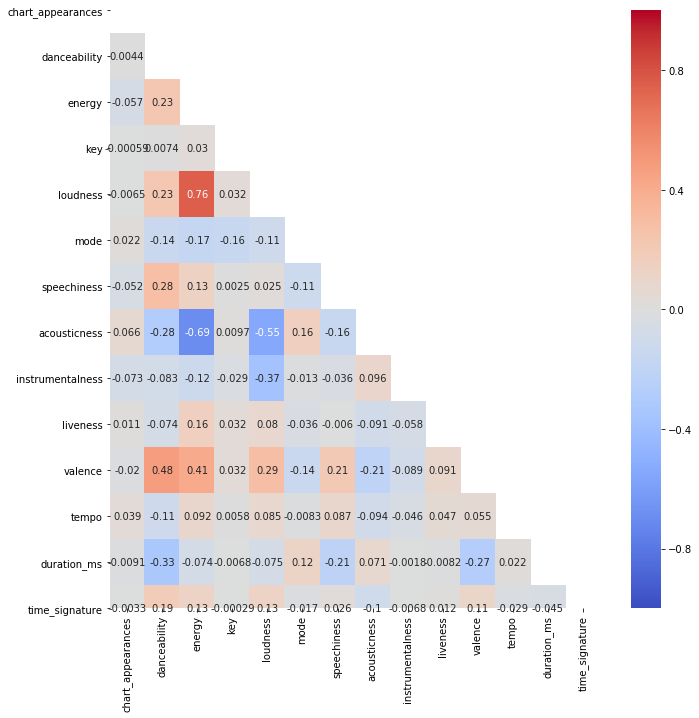

In [11]:
# Probably a good idea to choose between loudness or energy

fig, ax = plt.subplots(figsize = (11,11))

mask = np.zeros_like(df.corr(), dtype = np.bool) # returns an array of zeros with shape of df.corr
mask[np.triu_indices_from(mask)] = True # sets left side of triangle to true
sns.heatmap(df.corr(), mask = mask, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1, ax =ax)

plt.show()

In [40]:
df.columns

Index(['chart_appearances', 'track_id', 'title', 'artist', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [3]:
sns.pairplot(df_smaller);

NameError: name 'df_smaller' is not defined